In [1]:
def heat_threshold(daily_high, high_thresh, daily_low=None, low_thresh=None):
    """
    Returns a heat day boolean based upon daily high and low heat index and manually set thresholds

    Arguments:\n
        daily_high: Numeric or dataframe column with daily high heat index\n
        daily_low: Optional, numeric or dataframe column with daily low heat index\n
        high_thresh: Numeric threshold to check for the daily high heat index\n
        low_thresh: Optional, numeric integer to check daily low threshold against
    """
    if daily_low is not None:
        if daily_high > high_thresh and daily_low > low_thresh:
            return True
        else:
            return False
    else:
        if daily_high > high_thresh:
            return True
        else:
            return False

In [2]:
import pandas as pd

df1=pd.read_csv('data/Info_requests/311_agg_bydate.csv')
df2=pd.read_csv('data/Info_requests/311_agg_byNC.csv')
df3=pd.read_csv('data/Info_requests/DTLA_temp.csv')


In [3]:
df2.head()

,Unnamed: 0,Creation Date,Neighborhood Council,Total Rows
0,0,2018-01-01,EMPOWERMENT CONGRESS CENTRAL AREA NDC,1
1,1,2018-01-01,LAKE BALBOA NC,1
2,2,2018-01-01,WILSHIRE CENTER - KOREATOWN NC,1
3,3,2018-01-02,CANOGA PARK NC,1
4,4,2018-01-02,HISTORIC HIGHLAND PARK NC,1


In [4]:
df1.head()

,Unnamed: 0,Creation Date,Total Rows
0,0,2018-01-01,5
1,1,2018-01-02,25
2,2,2018-01-03,28
3,3,2018-01-04,13
4,4,2018-01-05,18


In [5]:
df1.shape

(1902, 3)

In [6]:
df3.head()

,Unnamed: 0,date_time,stid,relative_humidity_high,air_temp_high,heat_index_high,relative_humidity_low,air_temp_low,heat_index_low,lon,lat
0,1826,2018-01-01,KCQT,96.07,69.98,68.25156,33.48,46.94,45.54755,-118.29122,34.02355
1,1827,2018-01-02,KCQT,93.03,75.92,74.15388,20.04,53.06,52.18179,-118.29122,34.02355
2,1828,2018-01-03,KCQT,86.70,73.94,71.99703,20.20,53.96,51.82477,-118.29122,34.02355
3,1829,2018-01-04,KCQT,90.04,73.94,72.41063,29.29,53.96,52.17210,-118.29122,34.02355
4,1830,2018-01-05,KCQT,80.51,71.96,71.45416,35.83,53.96,52.67829,-118.29122,34.02355


In [7]:
df3['heat_index_high']

0       68.25156
1       74.15388
2       71.99703
3       72.41063
4       71.45416
          ...   
1820    69.38316
1821    63.19336
1822    62.25117
1823    59.70921
1824    60.13926
Name: heat_index_high, Length: 1825, dtype: float64

In [8]:
# 1 merge "311_agg_bydate" file with the "DTLA_temp"
dfinal = df1.merge(df3, how='inner', left_on='Creation Date', right_on='date_time')
dfinal.head(5)

,Unnamed: 0_x,Creation Date,Total Rows,Unnamed: 0_y,date_time,stid,relative_humidity_high,air_temp_high,heat_index_high,relative_humidity_low,air_temp_low,heat_index_low,lon,lat
0,0,2018-01-01,5,1826,2018-01-01,KCQT,96.07,69.98,68.25156,33.48,46.94,45.54755,-118.29122,34.02355
1,1,2018-01-02,25,1827,2018-01-02,KCQT,93.03,75.92,74.15388,20.04,53.06,52.18179,-118.29122,34.02355
2,2,2018-01-03,28,1828,2018-01-03,KCQT,86.70,73.94,71.99703,20.20,53.96,51.82477,-118.29122,34.02355
3,3,2018-01-04,13,1829,2018-01-04,KCQT,90.04,73.94,72.41063,29.29,53.96,52.17210,-118.29122,34.02355
4,4,2018-01-05,18,1830,2018-01-05,KCQT,80.51,71.96,71.45416,35.83,53.96,52.67829,-118.29122,34.02355


In [9]:
# apply the "heat_threshold" function to each row with high thres as 90 and low thres as 70 
dfinal['check_hot'] = dfinal.apply(lambda x: heat_threshold(x.heat_index_high,90.0, x.heat_index_low,70.0), axis=1)

In [10]:
dfinal.head()

,Unnamed: 0_x,Creation Date,Total Rows,Unnamed: 0_y,date_time,stid,relative_humidity_high,air_temp_high,heat_index_high,relative_humidity_low,air_temp_low,heat_index_low,lon,lat,check_hot
0,0,2018-01-01,5,1826,2018-01-01,KCQT,96.07,69.98,68.25156,33.48,46.94,45.54755,-118.29122,34.02355,False
1,1,2018-01-02,25,1827,2018-01-02,KCQT,93.03,75.92,74.15388,20.04,53.06,52.18179,-118.29122,34.02355,False
2,2,2018-01-03,28,1828,2018-01-03,KCQT,86.70,73.94,71.99703,20.20,53.96,51.82477,-118.29122,34.02355,False
3,3,2018-01-04,13,1829,2018-01-04,KCQT,90.04,73.94,72.41063,29.29,53.96,52.17210,-118.29122,34.02355,False
4,4,2018-01-05,18,1830,2018-01-05,KCQT,80.51,71.96,71.45416,35.83,53.96,52.67829,-118.29122,34.02355,False


In [11]:
# data of days that are considered extreme heat
data_True = dfinal[dfinal['check_hot'] == True]
data_True = data_True[['Creation Date','Total Rows','heat_index_high', 'heat_index_low']]
data_True

,Creation Date,Total Rows,heat_index_high,heat_index_low
183,2018-07-07,14,104.155024,79.123990
184,2018-07-08,7,96.229430,79.899330
185,2018-07-09,26,94.127112,75.684020
186,2018-07-10,32,90.343485,74.490850
187,2018-07-11,38,90.658630,72.692140
199,2018-07-23,37,95.379192,70.365150
200,2018-07-24,34,97.127396,72.303920
201,2018-07-25,30,93.693014,72.963330
205,2018-07-29,5,94.838664,70.507560
209,2018-08-02,29,91.612957,72.303920


In [12]:
# data of days that are considered bellow high thres 

data_False = dfinal[dfinal['check_hot'] == False]
data_False = data_False[['Creation Date','Total Rows','heat_index_high', 'heat_index_low']]
data_False


,Creation Date,Total Rows,heat_index_high,heat_index_low
0,2018-01-01,5,68.25156,45.54755
1,2018-01-02,25,74.15388,52.18179
2,2018-01-03,28,71.99703,51.82477
3,2018-01-04,13,72.41063,52.17210
4,2018-01-05,18,71.45416,52.67829
...,...,...,...,...
1793,2022-12-27,20,69.38316,53.72670
1794,2022-12-28,20,63.19336,51.24618
1795,2022-12-29,19,62.25117,56.20597
1796,2022-12-30,18,59.70921,56.20597


/tmp/ipykernel_121/189562348.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(labels)


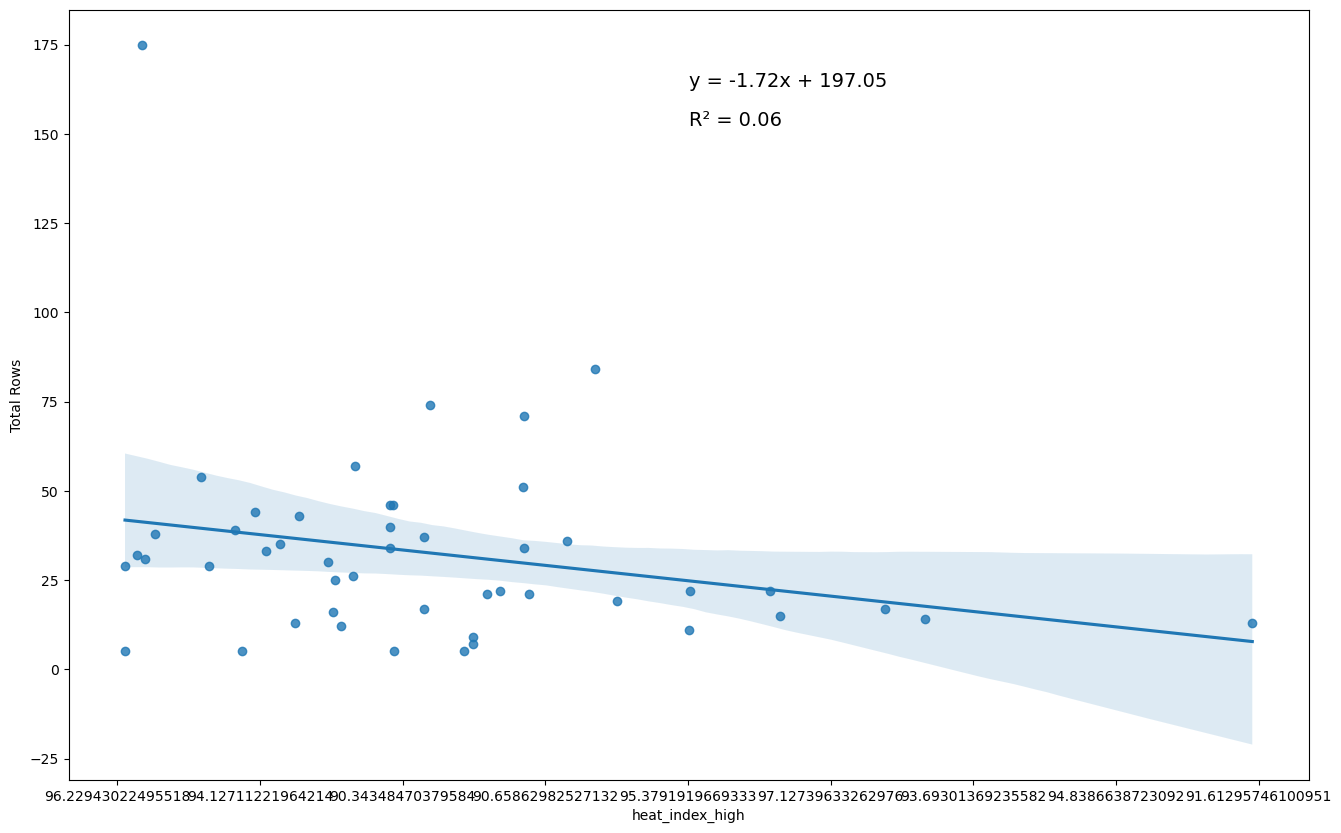

In [18]:
# plot scatter with regression line for data with extreme heat
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


# Initialize layout

plt.figure(figsize=(16,10))
fig = sns.regplot(data = data_True, x = 'heat_index_high', y = 'Total Rows')

labels = list(data_True['heat_index_high'].values)


# Fit a linear regression model
X = data_True['heat_index_high'].values.reshape(-1,1)
y = data_True['Total Rows'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)

# Add regression equation and R^2 value to plot
equation = 'y = {:.2f}x + {:.2f}'.format(reg.coef_[0][0], reg.intercept_[0])
r_squared = 'R² = {:.2f}'.format(reg.score(X, y))
plt.text(0.5, 0.9, equation, fontsize=14, transform=plt.gca().transAxes)
plt.text(0.5, 0.85, r_squared, fontsize=14, transform=plt.gca().transAxes)

# Set x-tick labels
fig.set_xticklabels(labels)

# Change x-axis title
plt.xlabel('heat_index_high')

plt.show()


## Testing out some new code below to add R2 & regression equation


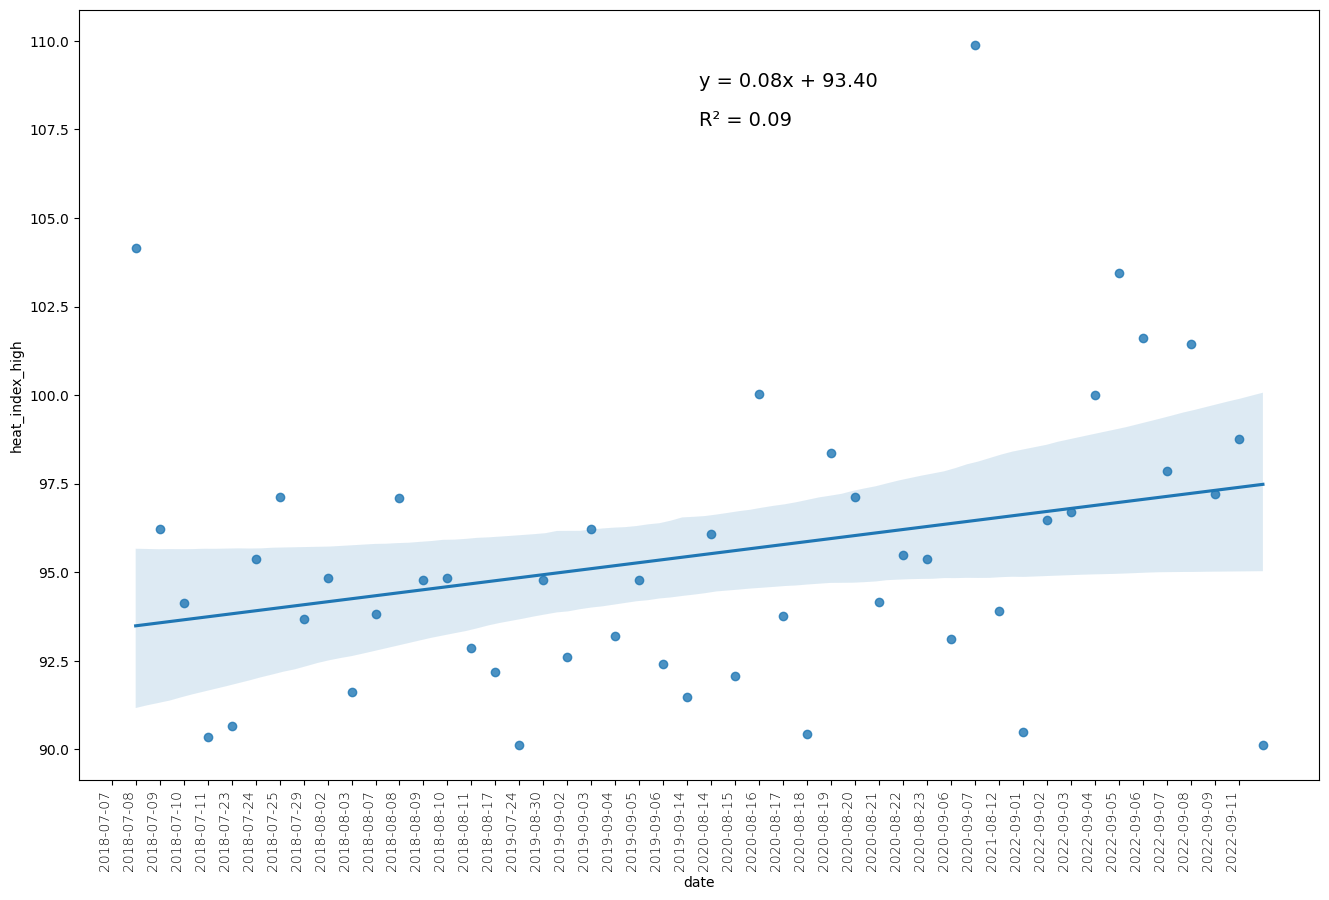

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Rename existing 'row_count' column to 'prev_count'
data_True.rename(columns={'row_count': 'prev_count'}, inplace=True)

# Insert new 'row_count' column
data_True.insert(data_True.shape[1], 'row_count', data_True.index.value_counts().sort_index().cumsum())

plt.figure(figsize=(16,10))

# Plot scatter plot and regression line
sns.regplot(data=data_True, x='heat_index_high', y='Total Rows')

# Fit a linear regression model
X = data_True['heat_index_high'].values.reshape(-1,1)
y = data_True['Total Rows'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)

# Add regression equation and R^2 value to plot
equation = 'y = {:.2f}x + {:.2f}'.format(reg.coef_[0][0], reg.intercept_[0])
r_squared = 'R² = {:.2f}'.format(reg.score(X, y))
plt.text(0.5, 0.9, equation, fontsize=14, transform=plt.gca().transAxes)
plt.text(0.5, 0.85, r_squared, fontsize=14, transform=plt.gca().transAxes)

# Set x-tick labels
labels = list(data_True['Creation Date'].values)
plt.xticks(range(len(labels)), labels, rotation=90, horizontalalignment='right', fontweight='light')

# Set x-axis title
plt.xlabel('date')

plt.show()

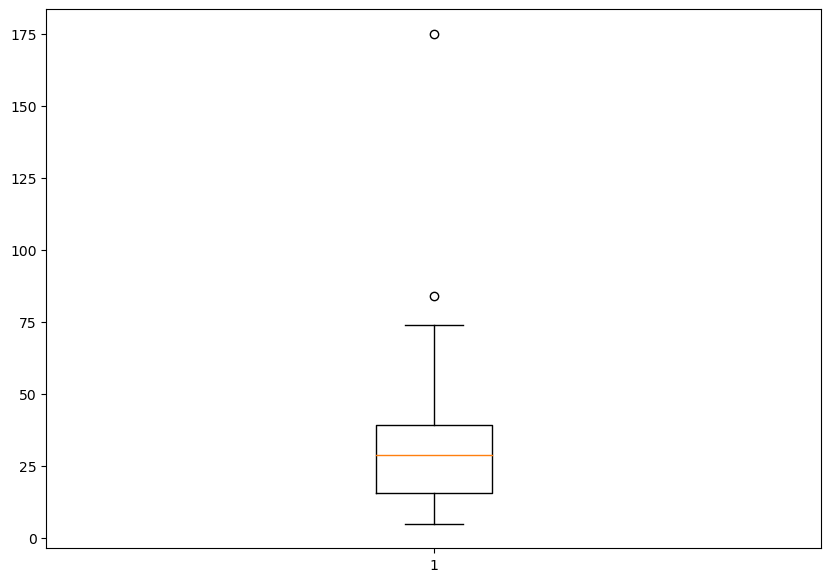

In [19]:
# plot box plot for data with extreme heat 

import matplotlib.pyplot as plt
 
fig = plt.figure(figsize =(10, 7))
# Creating plot
## why did you plot heat_index_high -- I am interested in the total number of calls??
plt.boxplot(data_True['Total Rows'])
 
# show plot
plt.show()

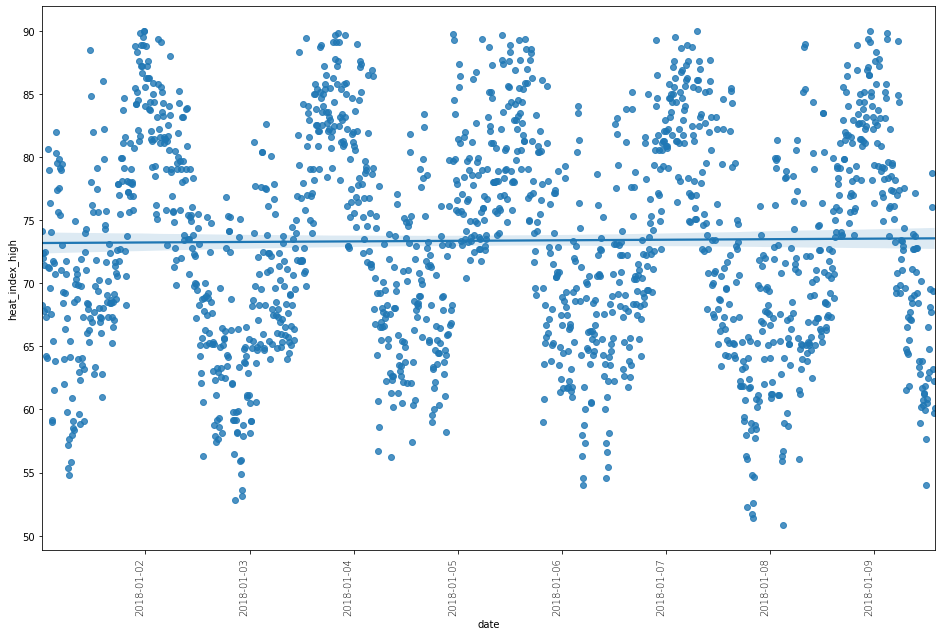

In [88]:
# plot scatter with regression line for data with bellow high thres (it's impossible to show all date in the X axis )
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Initialize layout

data_False.insert(data_False.shape[1],'row_count',data_False.index.value_counts().sort_index().cumsum())
plt.figure(figsize=(16,10))
fig = sns.regplot(data = data_False, x = 'row_count', y = 'heat_index_high')
labels = [item.get_text() for item in fig.get_xticklabels()]

labels = list(data_False['Creation Date'].values)

# Set x-tick labels
fig.set_xticklabels(labels)

# Rotate the labels so you can read them
plt.xticks(rotation = 90,horizontalalignment='right',fontweight='light')

# Change x-axis title
plt.xlabel('date')

plt.show()

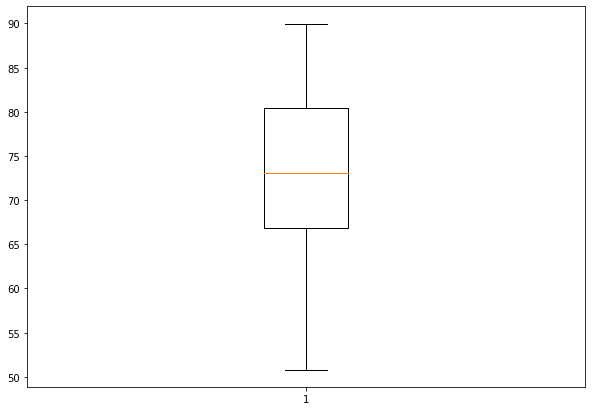

In [89]:
# plot box plot for for data with bellow high thres

import matplotlib.pyplot as plt
 
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(data_False['heat_index_high'])
 
# show plot
plt.show()

In [90]:
# Second dataframe (Same comment and same code)

dfinal = df2.merge(df3, how='inner', left_on='Creation Date', right_on='date_time')
dfinal.head(5)

,Unnamed: 0_x,Creation Date,Neighborhood Council,Total Rows,Unnamed: 0_y,date_time,stid,relative_humidity_high,air_temp_high,heat_index_high,relative_humidity_low,air_temp_low,heat_index_low,lon,lat
0,0,2018-01-01,EMPOWERMENT CONGRESS CENTRAL AREA NDC,1,1826,2018-01-01,KCQT,96.07,69.98,68.25156,33.48,46.94,45.54755,-118.29122,34.02355
1,1,2018-01-01,LAKE BALBOA NC,1,1826,2018-01-01,KCQT,96.07,69.98,68.25156,33.48,46.94,45.54755,-118.29122,34.02355
2,2,2018-01-01,WILSHIRE CENTER - KOREATOWN NC,1,1826,2018-01-01,KCQT,96.07,69.98,68.25156,33.48,46.94,45.54755,-118.29122,34.02355
3,3,2018-01-02,CANOGA PARK NC,1,1827,2018-01-02,KCQT,93.03,75.92,74.15388,20.04,53.06,52.18179,-118.29122,34.02355
4,4,2018-01-02,HISTORIC HIGHLAND PARK NC,1,1827,2018-01-02,KCQT,93.03,75.92,74.15388,20.04,53.06,52.18179,-118.29122,34.02355


In [92]:
dfinal['check_hot'] = dfinal.apply(lambda x: heat_threshold(x.heat_index_high,90.0, x.heat_index_low,52.0), axis=1)

In [96]:
# data of days that are considered extreme heat
data_True = dfinal[dfinal['check_hot'] == True]
data_True = data_True[['Creation Date','heat_index_high']]
data_True

,Creation Date,heat_index_high
426,2018-04-07,90.146336
427,2018-04-07,90.146336
595,2018-05-12,101.503004
842,2018-07-06,103.638793
843,2018-07-06,103.638793
...,...,...
10679,2022-09-09,98.761639
10680,2022-09-09,98.761639
10682,2022-09-11,90.132429
10683,2022-09-11,90.132429


In [94]:
# data of days that are considered bellow high thres 

data_False = dfinal[dfinal['check_hot'] == False]
data_False = data_False[['Creation Date','heat_index_high']]


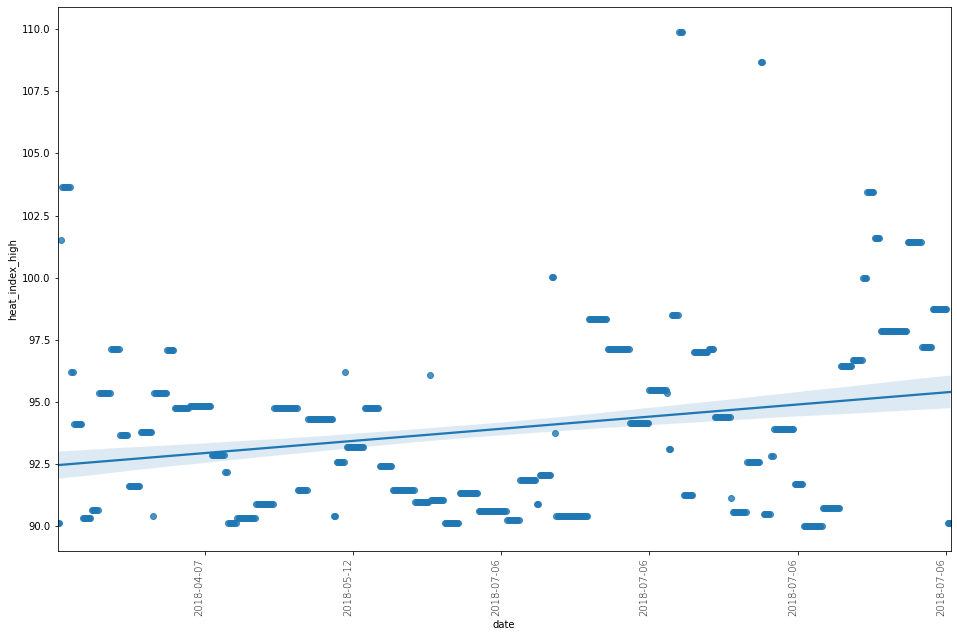

In [97]:
# plot scatter with regression line for data with extreme heat
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Initialize layout

data_True.insert(data_True.shape[1],'row_count',data_True.index.value_counts().sort_index().cumsum())
plt.figure(figsize=(16,10))
fig = sns.regplot(data = data_True, x = 'row_count', y = 'heat_index_high')
labels = [item.get_text() for item in fig.get_xticklabels()]

labels = list(data_True['Creation Date'].values)

# Set x-tick labels
fig.set_xticklabels(labels)

# Rotate the labels so you can read them
plt.xticks(rotation = 90,horizontalalignment='right',fontweight='light')

# Change x-axis title
plt.xlabel('date')

plt.show()

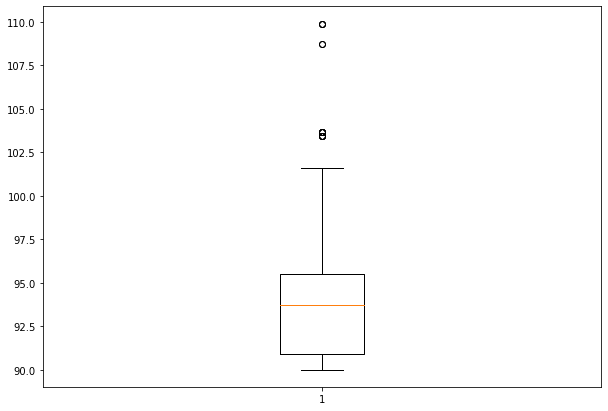

In [98]:
# plot box plot for data with extreme heat 

import matplotlib.pyplot as plt
 
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(data_True['heat_index_high'])
 
# show plot
plt.show()

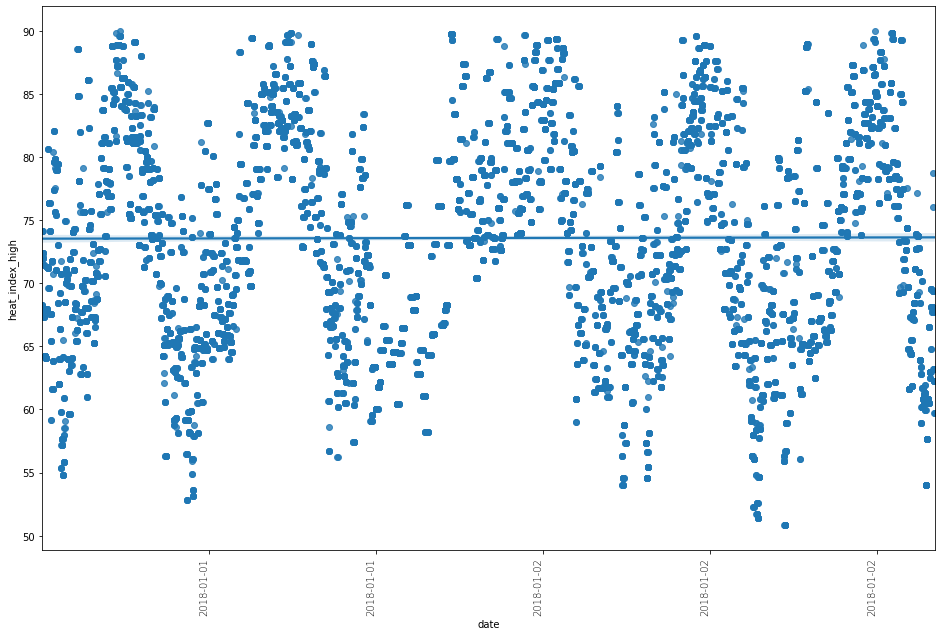

In [99]:
# plot scatter with regression line for data with bellow high thres 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Initialize layout

data_False.insert(data_False.shape[1],'row_count',data_False.index.value_counts().sort_index().cumsum())
plt.figure(figsize=(16,10))
fig = sns.regplot(data = data_False, x = 'row_count', y = 'heat_index_high')
labels = [item.get_text() for item in fig.get_xticklabels()]

labels = list(data_False['Creation Date'].values)

# Set x-tick labels
fig.set_xticklabels(labels)

# Rotate the labels so you can read them
plt.xticks(rotation = 90,horizontalalignment='right',fontweight='light')

# Change x-axis title
plt.xlabel('date')

plt.show()

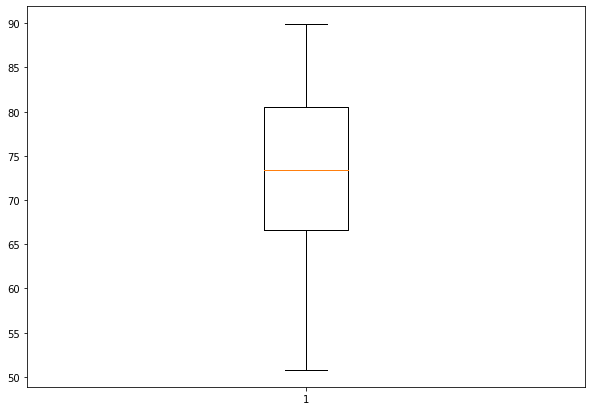

In [100]:
# plot box plot for for data with bellow high thres

import matplotlib.pyplot as plt
 
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(data_False['heat_index_high'])
 
# show plot
plt.show()